# 01-LeNet5

![](https://images.unsplash.com/photo-1495592528496-a143a67931d6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Pietro Jeng](https://unsplash.com/photos/sQVXS8HBPPc)

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [41]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#X_train = X_train[:10000]
#y_train = y_train[:10000]
#X_test = X_test[:2000]
#y_test = y_test[:2000]

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

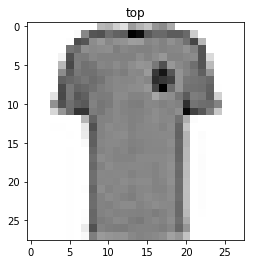

In [42]:
# TODO: Explore the data, display some input images
### STRIP_START ###
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()
### STRIP_END ###

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [43]:
# TODO: Make the data preparation
### STRIP_START ###
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train/255.
X_test_norm = X_test/255.

#X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], np.prod(X_train_norm.shape[1:]))
#X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], np.prod(X_test_norm.shape[1:]))


X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 28, 28, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 28, 28, 1)
### STRIP_END ###

In [44]:
X_train_norm.shape

(60000, 28, 28, 1)

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

![](../../../00-Lectures/images/Lenet5.png)

In [45]:
# TODO: Build your model
### STRIP_START ###
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, name='C1', kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu', name='C5'))
    # Layer F6
    model.add(Dense(units=84, activation='relu', name='F6'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model
### STRIP_END ###

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [46]:
# TODO: Compile and fit your model
### STRIP_START ###
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

model = lenet5()

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

# Finally fit the model
model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=100, batch_size=64, callbacks=callbacks)
### STRIP_END ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.6135 - val_loss: 0.4591
Epoch 2/100
60000/60000 [==============================] - 15s 258us/step - loss: 0.4176 - val_loss: 0.4287
Epoch 3/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.3656 - val_loss: 0.3716
Epoch 4/100
60000/60000 [==============================] - 15s 258us/step - loss: 0.3361 - val_loss: 0.3594
Epoch 5/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.3117 - val_loss: 0.3388
Epoch 6/100
60000/60000 [==============================] - 16s 259us/step - loss: 0.2904 - val_loss: 0.3115
Epoch 7/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.2763 - val_loss: 0.3114
Epoch 8/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.2594 - val_loss: 0.2937
Epoch 9/100
60000/60000 [==============================] - 16s 262us/step - loss: 0.24

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used a couple of days ago?

In [47]:
# TODO: Compute the accuracy of your model
### STRIP_START ###
from sklearn.metrics import accuracy_score

y_pred_train = to_categorical(model.predict(X_train_norm).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))
### STRIP_END ###

accuracy on train with NN: 0.9768666666666667
accuracy on test with NN: 0.8969


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

Begin by creating an object `ImageDataGenerator` with this parameter.

In [48]:
# TODO: Instantiate an ImageDataGenerator object
### STRIP_START ###
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True)
### STRIP_END ###

Then you have to fit your `ImageDataGenerator` on your training set of images before any preprocessing.

In [49]:
# TODO: fit your ImageDataGenerator object
### STRIP_START ###
datagen.fit(X_train_norm)
### STRIP_END ###

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [51]:
# TODO: train your model
### STRIP_START ###
batch_size = 64
model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
                    validation_data=(X_test_norm, y_test_cat), callbacks=callbacks,
                    steps_per_epoch=len(X_train_norm) / batch_size, epochs=100)

### STRIP_END ###

Epoch 1/100
938/937 [==============================] - 14s 15ms/step - loss: 0.3191 - val_loss: 0.3322
Epoch 2/100
938/937 [==============================] - 16s 17ms/step - loss: 0.2126 - val_loss: 0.3395
Epoch 3/100
938/937 [==============================] - 15s 16ms/step - loss: 0.1931 - val_loss: 0.3277
Epoch 4/100
938/937 [==============================] - 15s 16ms/step - loss: 0.1790 - val_loss: 0.3396
Epoch 5/100
938/937 [==============================] - 15s 16ms/step - loss: 0.1728 - val_loss: 0.3396
Epoch 6/100
938/937 [==============================] - 16s 17ms/step - loss: 0.1658 - val_loss: 0.3365
Epoch 7/100
938/937 [==============================] - 17s 18ms/step - loss: 0.1584 - val_loss: 0.3509
Epoch 8/100
938/937 [==============================] - 18s 19ms/step - loss: 0.1505 - val_loss: 0.3436
Epoch 9/100
938/937 [==============================] - 17s 18ms/step - loss: 0.1481 - val_loss: 0.3690
Epoch 10/100
938/937 [==============================] - 15s 16ms/step - l

Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [40]:
# TODO: Compute the accuracy of your model
### STRIP_START ###
from sklearn.metrics import accuracy_score

y_pred_train = to_categorical(model.predict(X_train_norm).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))
### STRIP_END ###

accuracy on train with NN: 0.9903
accuracy on test with NN: 0.8615


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...